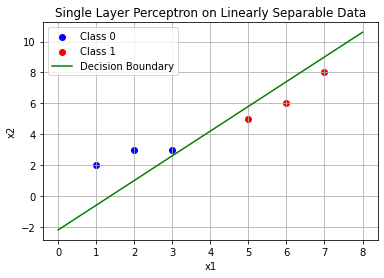

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'x1': [1, 2, 3, 5, 6, 7],
    'x2': [2, 3, 3, 5, 6, 8],
    'd(n)': [0, 0, 0, 1, 1, 1]
})

X = data[['x1', 'x2']].values 
y = data['d(n)'].values  

X_bias = np.c_[np.ones(X.shape[0]), X]

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights
        self.weights = np.zeros(n_features)

        # Training the perceptron
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights)
                y_predicted = self.activation_function(linear_output)
                # Update weights
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights)
        return np.array([self.activation_function(x) for x in linear_output])

perceptron = Perceptron(learning_rate=0.1, n_iterations=1000)
perceptron.fit(X_bias, y)

predictions = perceptron.predict(X_bias)

plt.scatter(data[data['d(n)'] == 0]['x1'], data[data['d(n)'] == 0]['x2'], color='blue', label='Class 0')
plt.scatter(data[data['d(n)'] == 1]['x1'], data[data['d(n)'] == 1]['x2'], color='red', label='Class 1')

x_range = np.linspace(0, 8, 100)
y_boundary = -(perceptron.weights[0] + perceptron.weights[1] * x_range) / perceptron.weights[2]
plt.plot(x_range, y_boundary, color='green', label='Decision Boundary')
plt.title('Single Layer Perceptron on Linearly Separable Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()

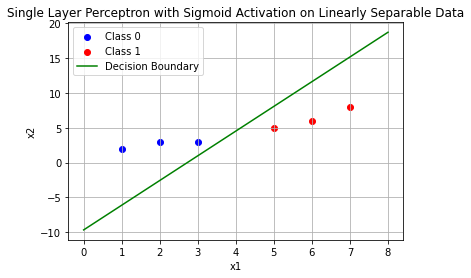

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'x1': [1, 2, 3, 5, 6, 7],
    'x2': [2, 3, 3, 5, 6, 8],
    'd(n)': [0, 0, 0, 1, 1, 1]
})

X = data[['x1', 'x2']].values 
y = data['d(n)'].values 

X_bias = np.c_[np.ones(X.shape[0]), X]

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights)
                y_predicted = self.sigmoid(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted) * y_predicted * (1 - y_predicted)  # Gradient of sigmoid
                self.weights += update * x_i

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, X):
        linear_output = np.dot(X, self.weights)
        y_predicted = self.sigmoid(linear_output)
        return np.where(y_predicted >= 0.5, 1, 0)  # Threshold at 0.5

perceptron = Perceptron(learning_rate=0.1, n_iterations=1000)
perceptron.fit(X_bias, y)

predictions = perceptron.predict(X_bias)

plt.scatter(data[data['d(n)'] == 0]['x1'], data[data['d(n)'] == 0]['x2'], color='blue', label='Class 0')
plt.scatter(data[data['d(n)'] == 1]['x1'], data[data['d(n)'] == 1]['x2'], color='red', label='Class 1')

x_range = np.linspace(0, 8, 100)
y_boundary = -(perceptron.weights[0] + perceptron.weights[1] * x_range) / perceptron.weights[2]
plt.plot(x_range, y_boundary, color='green', label='Decision Boundary')

plt.title('Single Layer Perceptron with Sigmoid Activation on Linearly Separable Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()